In [33]:
# import main lib for machine learning

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import os

In [34]:
 # Define paths to your dataset
base_path = '/Users/msalah/Downloads/triple_mnist/'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
val_path = os.path.join(base_path, 'val')

**Import the data from the excel file**

In [37]:
import os
from PIL import Image

def load_images_from_folder(folder_path):
    images = []
    labels = []
    class_folders = sorted(os.listdir(folder_path))  # Assumes class folders are named by numbers or labels
    for class_folder in class_folders:
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                if img_path.endswith('.jpg') or img_path.endswith('.png'):  # Adjust based on your image formats
                    try:
                        img = Image.open(img_path)
                        img = np.array(img)  # Convert PIL Image to numpy array
                        images.append(img)
                        #labels.append(int(class_folder))  # Assuming class folders are named numerically
                        labels.append([int(digit) for digit in class_folder])  # Convert class_folder name to list of digits

                    except Exception as e:
                        print(f"Error loading image: {img_path}. {e}")
    return images, labels


In [38]:


def load_and_prepare_data():
    global x_train, y_train, x_test, y_test, x_val, y_val
    
   

    # Load images and labels for train, test, and val sets
    x_train, y_train = load_images_from_folder(train_path)
    x_test, y_test = load_images_from_folder(test_path)
    x_val, y_val = load_images_from_folder(val_path)

    # Convert lists to numpy arrays for easier manipulation
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    x_val = np.array(x_val)

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_val = np.array(y_val)

    # Print out the shapes to verify
    print(f"Train images shape: {x_train.shape}, Train labels shape: {y_train.shape}")
    print(f"Test images shape: {x_test.shape}, Test labels shape: {y_test.shape}")
    print(f"Val images shape: {x_val.shape}, Val labels shape: {y_val.shape}")


load_and_prepare_data()


Train images shape: (64000, 84, 84), Train labels shape: (64000, 3)
Test images shape: (20000, 84, 84), Test labels shape: (20000, 3)
Val images shape: (16000, 84, 84), Val labels shape: (16000, 3)


/Users/msalah/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


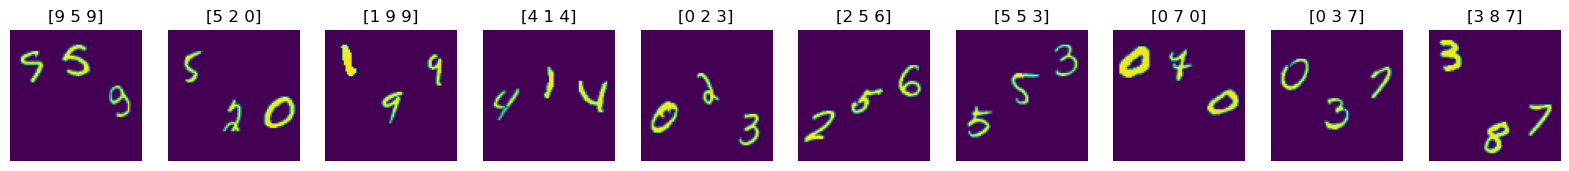

In [31]:

# print a couple of images from x_train data

from random import Random
rand = Random()
plt.figure(figsize=(20, 2))
for i in range(0, 10):
    plt.subplot(1,10, i + 1)
    x = rand.randint(0, len(x_train) - 1)  # select a random index from x_train data
    plt.imshow(x_train[x])
    plt.title(y_train[x])
    plt.axis('off')
plt.show()

In [39]:
# Discover y_train
distinct_labels = np.unique(y_train)
print(distinct_labels)

[0 1 2 3 4 5 6 7 8 9]


In [40]:
 #Discover y_test
distinct_labels = np.unique(y_test)
print(distinct_labels)

[0 1 2 3 4 5 6 7 8 9]


In [41]:
#discover y_val
distinct_labels = np.unique(y_val)
print(distinct_labels)

[0 1 2 3 4 5 6 7 8 9]


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
inputs = Input(shape=(84, 84, 1))

# Convolutional layers
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)

# Output layers for each digit
digit1 = Dense(10, activation='softmax', name='digit1')(x)
digit2 = Dense(10, activation='softmax', name='digit2')(x)
digit3 = Dense(10, activation='softmax', name='digit3')(x)

# Create the model
model = Model(inputs=inputs, outputs=[digit1, digit2, digit3])

# Compile the model
model.compile(optimizer='adam',
              loss={'digit1': 'sparse_categorical_crossentropy', 'digit2': 'sparse_categorical_crossentropy', 'digit3': 'sparse_categorical_crossentropy'},
              metrics=['accuracy', 'accuracy', 'accuracy'])

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 84, 84, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 82, 82,    │        320 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 41, 41,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 39, 39,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 19, 19,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 23104)     │          0 │ max_pooling2d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit1 (Dense)      │ (None, 10)        │    231,050 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit2 (Dense)      │ (None, 10)        │    231,050 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit3 (Dense)      │ (None, 10)        │    231,050 │ flatten_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 711,966 (2.72 MB)

 Trainable params: 711,966 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

array([  0,   0,   0, ..., 997, 997, 997])

In [47]:
history = model.fit(x_train, 
                    {'digit1': y_train[:, 0], 'digit2': y_train[:, 1], 'digit3': y_train[:, 2]},
                    validation_data=(x_val, {'digit1': y_val[:, 0], 'digit2': y_val[:, 1], 'digit3': y_val[:, 2]}),
                    epochs=10,
                    batch_size=64)


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 75s 74ms/step - digit1_accuracy: 0.5806 - digit2_accuracy: 0.5931 - digit3_accuracy: 0.5668 - loss: 6.8393 - val_digit1_accuracy: 0.8854 - val_digit2_accuracy: 0.8779 - val_digit3_accuracy: 0.8742 - val_loss: 1.1550
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 74s 74ms/step - digit1_accuracy: 0.9193 - digit2_accuracy: 0.9180 - digit3_accuracy: 0.9116 - loss: 0.7891 - val_digit1_accuracy: 0.9053 - val_digit2_accuracy: 0.9099 - val_digit3_accuracy: 0.8973 - val_loss: 0.9291
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 76s 76ms/step - digit1_accuracy: 0.9464 - digit2_accuracy: 0.9460 - digit3_accuracy: 0.9403 - loss: 0.5136 - val_digit1_accuracy: 0.9120 - val_digit2_accuracy: 0.9146 - val_digit3_accuracy: 0.9064 - val_loss: 0.8814
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 75s 75ms/step - digit1_accuracy: 0.9634 - digit2_accuracy: 0.9633 - digit3_accuracy: 0.9591 - loss: 0.3413 - val_digit1_accuracy: 0.9119 - val_digit2_accuracy: 0.9162 - val_digit3_accu

In [49]:
# evaluate the training
loss, accuracy1, accuracy2, accuracy3 = model.evaluate(x_test, 
                                                      {'digit1': y_test[:, 0], 'digit2': y_test[:, 1], 'digit3': y_test[:, 2]})

print(f"Test loss: {loss}")
print(f"Test accuracy for digit 1: {accuracy1}")
print(f"Test accuracy for digit 2: {accuracy2}")
print(f"Test accuracy for digit 3: {accuracy3}")



625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - digit1_accuracy: 0.9353 - digit2_accuracy: 0.9306 - digit3_accuracy: 0.9157 - loss: 1.2845
Test loss: 1.3814635276794434
Test accuracy for digit 1: 0.9248999953269958
Test accuracy for digit 2: 0.9251499772071838
Test accuracy for digit 3: 0.9196500182151794


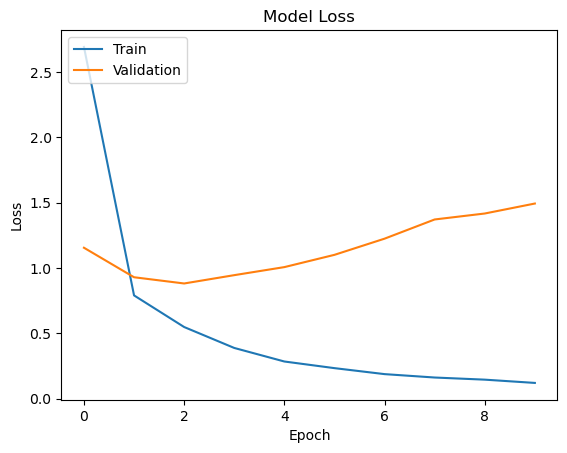

In [50]:
# sketch graph between train and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

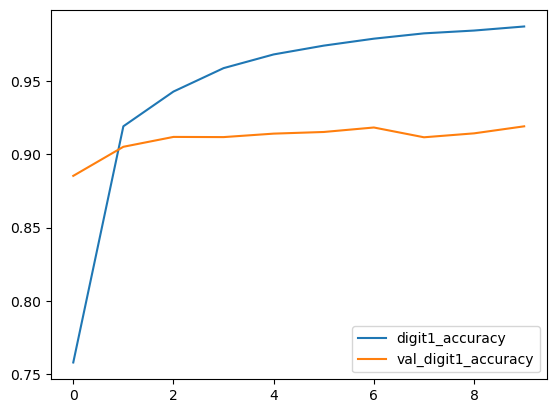

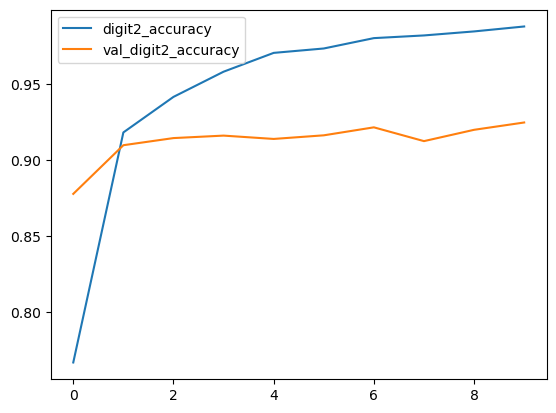

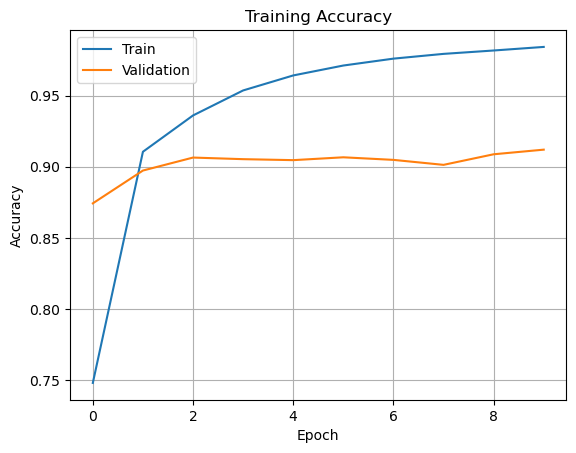

In [62]:
train_perf = pd.DataFrame(history.history)
#get the column names
train_perf.columns

train_perf[['digit1_accuracy', 'val_digit1_accuracy']].plot()

train_perf[['digit2_accuracy', 'val_digit2_accuracy']].plot()
train_perf[['digit3_accuracy', 'val_digit3_accuracy']].plot()

plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.xlabel('Epoch')
plt.title('Training Accuracy')
plt.grid()
plt.show()